In [14]:
import pandas as pd
import datetime
import pickle
import binascii

In [3]:
!pip install Kqlmagic --no-cache-dir --upgrade


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


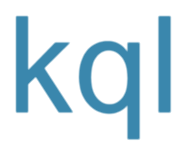

In [1]:
%reload_ext Kqlmagic

In [2]:
%kql kusto://code;cluster='Help';database='Samples'

<IPython.core.display.Javascript object>

In [3]:
# NOTE: to make hash() consistent set env. variable PYTHONHASHSEED=0
%env PYTHONHASHSEED=0

q = '''
OccupancyDetection
'''

fn = "df" + str(hash(q)) + ".pkl"
print("Cache file name: ", fn)

env: PYTHONHASHSEED=0
Cache file name:  df-1166806860828546482.pkl


In [4]:
fn = "df" + str(hash(q)) + ".pkl"
try:
    df = pd.read_pickle(fn)
    print("Load df from " + fn)
except:
    print("Execute query...")
    try:
        %kql res << -query q
        df = res.to_dataframe()
        print("Save df to " + fn)
        df.to_pickle(fn)
        print("\n", df.shape, "\n", df.columns)
    except Exception as ex:
        print(ex)

Execute query...
Save df to df-1166806860828546482.pkl

 (20560, 8) 
 Index(['Timestamp', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'Test'],
      dtype='object')


In [5]:
print(df.shape, "\n")
print(df[-4:])

(20560, 8) 

                      Timestamp  Temperature  Humidity   Light     CO2  \
20556 2015-02-18 09:16:00+00:00       20.865   27.7450  423.50  1514.5   
20557 2015-02-18 09:16:00+00:00       20.890   27.7450  423.50  1521.5   
20558 2015-02-18 09:17:00+00:00       20.890   28.0225  418.75  1632.0   
20559 2015-02-18 09:19:00+00:00       21.000   28.1000  409.00  1864.0   

       HumidityRatio  Occupancy  Test  
20556       0.004230       True  True  
20557       0.004237       True  True  
20558       0.004279       True  True  
20559       0.004321       True  True  


In [6]:
df.groupby(['Test', 'Occupancy']).size()

Test   Occupancy
False  False        6414
       True         1729
True   False        9396
       True         3021
dtype: int64

In [7]:
train_x = df[df['Test'] == False][['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
train_y = df[df['Test'] == False]['Occupancy']
test_x = df[df['Test'] == True][['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]
test_y = df[df['Test'] == True]['Occupancy']

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(8143, 5) (8143,) (12417, 5) (12417,)


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#four classifier types
clf1 = tree.DecisionTreeClassifier()
clf2 = LogisticRegression()
clf3 = neighbors.KNeighborsClassifier()
clf4 = naive_bayes.GaussianNB()

In [23]:
X = df[["Occupancy"]].to_numpy()

In [24]:
y = df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']]

In [25]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=42)

In [26]:
model = LinearRegression()

In [27]:
model.fit(train_x, train_y)

LinearRegression()

In [28]:
coef = model.coef_
print(coef)

[[1.39691250e+00]
 [6.12821978e-01]
 [4.57224030e+02]
 [3.73528665e+02]
 [4.80917646e-04]]


In [29]:
intercept = model.intercept_
print(intercept)

[2.05861465e+01 2.75039658e+01 2.51113835e+01 6.05407650e+02
 4.11655076e-03]


In [30]:
pred_y = model.predict(train_x)
pred_y

array([[2.19830590e+01, 2.81167878e+01, 4.82335413e+02, 9.78936315e+02,
        4.59746841e-03],
       [2.05861465e+01, 2.75039658e+01, 2.51113835e+01, 6.05407650e+02,
        4.11655076e-03],
       [2.19830590e+01, 2.81167878e+01, 4.82335413e+02, 9.78936315e+02,
        4.59746841e-03],
       ...,
       [2.05861465e+01, 2.75039658e+01, 2.51113835e+01, 6.05407650e+02,
        4.11655076e-03],
       [2.19830590e+01, 2.81167878e+01, 4.82335413e+02, 9.78936315e+02,
        4.59746841e-03],
       [2.05861465e+01, 2.75039658e+01, 2.51113835e+01, 6.05407650e+02,
        4.11655076e-03]])

In [32]:
y_test_pred = model.predict(train_x)

In [33]:
train_score = model.score(train_x, train_y)

In [34]:
test_score = model.score(test_x, test_y)

In [35]:
# R-squared value
train_score

0.294636467505608

In [36]:
test_score

0.28840541852891227

In [38]:
from statsmodels.api import OLS

In [39]:
model2 = OLS(train_x, train_y)

In [40]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                -388.460
Model:                            OLS   Adj. R-squared (uncentered):           -388.586
Method:                 Least Squares   F-statistic:                             -3075.
Date:                Mon, 22 May 2023   Prob (F-statistic):                        1.00
Time:                        10:51:48   Log-Likelihood:                          6482.4
No. Observations:               15420   AIC:                                 -1.295e+04
Df Residuals:                   15415   BIC:                                 -1.292e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Temperature      -0.0087      0.000    -24.746      0.000      -0.009      -0.008
Humidity          0.0295      0.001     29.704      0.000       0.028       0.031
Light             0.0019   8.54e-06    222.430      0.000       0.002       0.002
CO2               0.0002   5.28e-06     37.159      0.000       0.000       0.000
HumidityRatio  -186.5989      7.198    -25.923      0.000    -200.708    -172.490
==============================================================================
Omnibus:                    11636.894   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494124.482
Skew:                          -3.214   Prob(JB):                         0.00
Kurtosis:                      29.977   Cond. No.                     4.37e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
clf1 = clf1.fit(train_x, train_y)
clf2 = clf2.fit(train_x, train_y)
clf3 = clf3.fit(train_x, train_y)
clf4 = clf4.fit(train_x, train_y)

In [10]:
for clf, label in zip([clf1, clf2, clf3, clf4], ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour', 'Naive Bayes']):
            scores = cross_val_score(clf, train_x, train_y, cv=5, scoring='accuracy')
            print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.9244 (+/- 0.0645) [Decision Tree]
Accuracy: 0.9819 (+/- 0.0165) [Logistic Regression]
Accuracy: 0.9503 (+/- 0.0555) [K Nearest Neighbour]
Accuracy: 0.9635 (+/- 0.0268) [Naive Bayes]


In [11]:
for clf, label in zip([clf1, clf2, clf3, clf4], ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbour', 'Naive Bayes']):
            scores = cross_val_score(clf, test_x, test_y, cv=5, scoring='accuracy')
            print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.8552 (+/- 0.1214) [Decision Tree]
Accuracy: 0.9886 (+/- 0.0070) [Logistic Regression]
Accuracy: 0.9656 (+/- 0.0223) [K Nearest Neighbour]
Accuracy: 0.8893 (+/- 0.1265) [Naive Bayes]


In [12]:
models_tbl = 'ML_Models_tmp'
model_name = 'Occupancy'

In [16]:
bmodel = pickle.dumps(clf2)
smodel = binascii.hexlify(bmodel)

now = datetime.datetime.now()
dfm = pd.DataFrame({'name':[model_name], 'timestamp':[now], 'model':[smodel]})
dfm

,name,timestamp,model
0,Occupancy,2023-05-22 10:25:16.506603,b'800363736b6c6561726e2e6c696e6561725f6d6f6465...


In [17]:
set_query = '''
.set-or-append {0} <|
let tbl = dfm;
tbl
'''.format(models_tbl)
print(set_query)


.set-or-append ML_Models_tmp <|
let tbl = dfm;
tbl



In [18]:
%kql -query set_query

In [15]:
import pickle
import binascii

bmodel = binascii.unhexlify(qmodel)
clfp = pickle.loads(bmodel)
print(clfp)

NameError: name 'qmodel' is not defined